<a href="https://colab.research.google.com/github/Courtney-ForzaAnalytics/PIVisualizations/blob/main/visualizingPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In honor of PI day ( March 14 ), let's spend some time visualizing the digits of PI.


In [2]:
# import some libraries for math and visualizations

from google.colab import files
from google.cloud import storage
from google.colab import data_table

import os
import io

import math

import decimal

from collections import defaultdict


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly as pltly

import plotly.express as px
import plotly.graph_objects as go



The first step is to get the digits of PI to a large number.

After trying a few different ways of calculating PI, without much success, I found a calculation of it online and used that instead.

The paper I took PI to a 10,000 digits from is "Ramanujan, Modular Equations, and Approximations to Pi or How to compute One Billion Digits of Pi***" by D.H. Bailey, J.M. Borwein and P.B.Borwein.  Here's a link to it: https://www.cecm.sfu.ca/organics/papers/borwein/

Many thanks to them for posting their results for public consumption.

Finally, I found PI to a million digits on piday.org.  You can access it here: https://www.piday.org/million/. Many thanks to that site for posting the full million!


In [91]:
# basic pi from built in math lib
pi = math.pi

print( f"{pi:.{100}f}" )

3.1415926535897931159979634685441851615905761718750000000000000000000000000000000000000000000000000000


In [90]:
# numpy pi- looks like it falls through to the basic lib
np_pi = np.pi

print( f"{np_pi:.{100}f}" )

3.1415926535897931159979634685441851615905761718750000000000000000000000000000000000000000000000000000


In [89]:
# leibniz pi

def calculate_leibniz_pi( iterations ):
    pi = 0
    for i in range( iterations ):
        pi += ( (-1)**i ) / ( 2*i + 1 )
    return pi*4

leibniz_pi = calculate_leibniz_pi(1000000)

print( f"{leibniz_pi:.{100}f}" )

3.1415916535897743244731827871873974800109863281250000000000000000000000000000000000000000000000000000


In [ ]:
# chudnovsky pi

def calculate_chudnovsky_pi( precision ):
    decimal.getcontext().prec = precision
    C = 426880 * decimal.Decimal(10005).sqrt()
    L = 13591409
    X = 1
    M = 1
    K = 6
    S = L
    for i in range(1, precision):
        M = (K**3 - 16*K) * M // i**3
        L += 545140134
        X *= -262537412640768000
        S += decimal.Decimal(M * L) / X
        K += 12
    pi = C / S
    return pi

chudnovsky_pi = calculate_chudnovsky_pi(1000)

print( f"{chudnovsky_pi:.{1000}f}" )


3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642020

In [3]:
# set up access to data drive

from google.colab import drive

WORK_DRIVE = '/gdrive'
WORK_AREA = WORK_DRIVE + '/MyDrive/Colab Notebooks/'

drive.mount(WORK_DRIVE)
os.chdir(WORK_AREA)

os.getcwd()

Mounted at /gdrive


'/gdrive/MyDrive/Colab Notebooks'

In [93]:


full_path = 'pimilliondigitsreally.txt'
f = open( full_path, 'rb')
print( f )

# read digits in, and they are binary strings
binary_lines = f.readlines()


# convert to ascii strings
text_lines = [ l.decode( 'utf-8' ) for l in binary_lines ]


# get rid of the newline characters
clean_lines = []
for line in text_lines:
    clean_lines.append(line.replace('\n', ''))


pi_string = ''.join( clean_lines )
print( "pi_string length:", len(pi_string ))



<_io.BufferedReader name='pimilliondigitsreally.txt'>
pi_string length: 1000001


In [6]:
# convert string to a list of digits

pi_digits = [int(d) for d in pi_string ]
print( "n digits of pi:", len( pi_digits))
print( "pi_digits:", pi_digits[0:1000] )




n digits of pi: 1000001
pi_digits: [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 7, 9, 3, 2, 3, 8, 4, 6, 2, 6, 4, 3, 3, 8, 3, 2, 7, 9, 5, 0, 2, 8, 8, 4, 1, 9, 7, 1, 6, 9, 3, 9, 9, 3, 7, 5, 1, 0, 5, 8, 2, 0, 9, 7, 4, 9, 4, 4, 5, 9, 2, 3, 0, 7, 8, 1, 6, 4, 0, 6, 2, 8, 6, 2, 0, 8, 9, 9, 8, 6, 2, 8, 0, 3, 4, 8, 2, 5, 3, 4, 2, 1, 1, 7, 0, 6, 7, 9, 8, 2, 1, 4, 8, 0, 8, 6, 5, 1, 3, 2, 8, 2, 3, 0, 6, 6, 4, 7, 0, 9, 3, 8, 4, 4, 6, 0, 9, 5, 5, 0, 5, 8, 2, 2, 3, 1, 7, 2, 5, 3, 5, 9, 4, 0, 8, 1, 2, 8, 4, 8, 1, 1, 1, 7, 4, 5, 0, 2, 8, 4, 1, 0, 2, 7, 0, 1, 9, 3, 8, 5, 2, 1, 1, 0, 5, 5, 5, 9, 6, 4, 4, 6, 2, 2, 9, 4, 8, 9, 5, 4, 9, 3, 0, 3, 8, 1, 9, 6, 4, 4, 2, 8, 8, 1, 0, 9, 7, 5, 6, 6, 5, 9, 3, 3, 4, 4, 6, 1, 2, 8, 4, 7, 5, 6, 4, 8, 2, 3, 3, 7, 8, 6, 7, 8, 3, 1, 6, 5, 2, 7, 1, 2, 0, 1, 9, 0, 9, 1, 4, 5, 6, 4, 8, 5, 6, 6, 9, 2, 3, 4, 6, 0, 3, 4, 8, 6, 1, 0, 4, 5, 4, 3, 2, 6, 6, 4, 8, 2, 1, 3, 3, 9, 3, 6, 0, 7, 2, 6, 0, 2, 4, 9, 1, 4, 1, 2, 7, 3, 7, 2, 4, 5, 8, 7, 0, 0, 6, 6, 0, 6, 3, 1, 5, 5, 8, 8, 1, 7, 4

{3: 100230, 1: 99758, 4: 100230, 5: 100359, 9: 100106, 2: 100026, 6: 99548, 8: 99985, 7: 99800, 0: 99959}
digits_dist_df:    digit   count
0      3  100230
1      1   99758
2      4  100230
3      5  100359
4      9  100106
5      2  100026
6      6   99548
7      8   99985
8      7   99800
9      0   99959


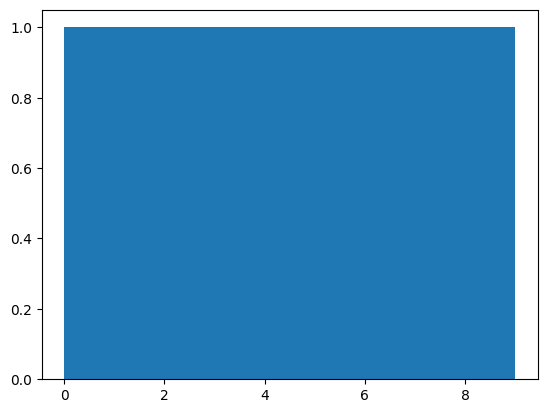

          digit          count
count  10.00000      10.000000
mean    4.50000  100000.100000
std     3.02765     247.513614
min     0.00000   99548.000000
25%     2.25000   99839.750000
50%     4.50000  100005.500000
75%     6.75000  100199.000000
max     9.00000  100359.000000


In [7]:
# ok! now we have something to work with.

# let's start with some basics - what's the distribution of digits in the first million digits of pi?

def get_digit_distribution( digits ):
    digit_counts = {}
    for digit in digits:
        if digit in digit_counts:
            digit_counts[digit] += 1
        else:
            digit_counts[digit] = 1
    return digit_counts

digit_distribution = get_digit_distribution( pi_digits )
print( digit_distribution )

# and create a dataframe
digits_dist_df = pd.DataFrame(list(digit_distribution.items()), columns=['digit', 'count'])
print( "digits_dist_df:", digits_dist_df )


plt.hist( digit_distribution, bins=10 )
plt.show()

print( digits_dist_df.describe() )


In [8]:
# define some useful values for graphs

piName = "\u03A0"
piDigitsLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']



In [88]:
# let's try to graph this prettier in Plotly



fig = go.Figure(
    data=[
        go.Bar(name='digit', x=digits_dist_df['digit'], y=digits_dist_df['count'])
    ],
    layout=go.Layout(
        title=dict(
            text="Distribution of digits for the first million places of " + piName,
            xanchor="center",
            yanchor="top",
            y=0.95,
            x=0.5
        ),
        xaxis=dict(
            title="Digits ( 0 - 9)",
            tickmode = 'array',
            tickvals = piDigitsLabels
        ),
        yaxis=dict(
            title=dict(
                text="Count of Occurences"
            )
        ),
        font=dict(
            family="Helvetica",
            size=18,
            color="IndianRed",
            variant="small-caps",
        ),
        width=1000, height=800,
    )
)

fig.show()




In [86]:
# seems like we should include a pie chart...

fig = go.Figure(
    data=[ go.Pie(labels=piDigitsLabels, values=digits_dist_df['count'])],
    layout=go.Layout(
        title=dict(
            text="Distribution of digits for the first million places of " + piName,
            xanchor="center",
            yanchor="top",
            y=0.95,
            x=0.5
        ),
        font=dict(
            family="Helvetica",
            size=18,
            color="IndianRed",
            variant="small-caps",
        ),
        width=1000, height=800,
    )
)


fig.show()

In [13]:
# let's try an animation to see how long it takes to get to the uniform distribution across digits

# first we'll need to add distributions for different cohorts of digits
# 0 - 100, 0 - 1000, 0 - 10,000, 0 - 100,000, 0 - 1,000,000

# create a df with a cohort column
cohorts = ['0 - 10', '0 - 20', '0 - 30', '0 - 40', '0 - 50', '0 - 60', '0 - 70', '0 - 80', '0 - 90', '0 - 100', '0 - 1000', '0 - 10,000', '0 - 100,000', '0 - 1,000,000']
cohort_max_digits = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000, 10000, 100000, 1000000]
cohort_distribution = []

def get_digit_distribution( digits, cohort_name ):
    digit_counts = {}
    for digit in digits:
        if digit in digit_counts:
            digit_counts[digit] += 1
        else:
            digit_counts[digit] = 1
    total_digits = sum( digit_counts.values() )

    return [(cohort_name, key, value, 100*value/total_digits) for key, value in digit_counts.items() ]

cohort_list = []
for i in range( 0, len( cohorts)):
    this_cohort = get_digit_distribution( pi_digits[0:cohort_max_digits[i]], cohorts[i] )
    cohort_list.extend( this_cohort )

print( cohort_list )

# and create a dataframe
cohorts_dist_df = pd.DataFrame(cohort_list, columns=['cohort', 'digit', 'count', 'percent'])
print( "cohorts_dist_df:", cohorts_dist_df.head(100) )

print( "columns:", cohorts_dist_df.columns )



[('0 - 10', 3, 2, 20.0), ('0 - 10', 1, 2, 20.0), ('0 - 10', 4, 1, 10.0), ('0 - 10', 5, 2, 20.0), ('0 - 10', 9, 1, 10.0), ('0 - 10', 2, 1, 10.0), ('0 - 10', 6, 1, 10.0), ('0 - 20', 3, 4, 20.0), ('0 - 20', 1, 2, 10.0), ('0 - 20', 4, 2, 10.0), ('0 - 20', 5, 3, 15.0), ('0 - 20', 9, 3, 15.0), ('0 - 20', 2, 2, 10.0), ('0 - 20', 6, 1, 5.0), ('0 - 20', 8, 2, 10.0), ('0 - 20', 7, 1, 5.0), ('0 - 30', 3, 7, 23.333333333333332), ('0 - 30', 1, 2, 6.666666666666667), ('0 - 30', 4, 3, 10.0), ('0 - 30', 5, 3, 10.0), ('0 - 30', 9, 3, 10.0), ('0 - 30', 2, 4, 13.333333333333334), ('0 - 30', 6, 3, 10.0), ('0 - 30', 8, 3, 10.0), ('0 - 30', 7, 2, 6.666666666666667), ('0 - 40', 3, 7, 17.5), ('0 - 40', 1, 3, 7.5), ('0 - 40', 4, 4, 10.0), ('0 - 40', 5, 4, 10.0), ('0 - 40', 9, 5, 12.5), ('0 - 40', 2, 5, 12.5), ('0 - 40', 6, 3, 7.5), ('0 - 40', 8, 5, 12.5), ('0 - 40', 7, 3, 7.5), ('0 - 40', 0, 1, 2.5), ('0 - 50', 3, 9, 18.0), ('0 - 50', 1, 5, 10.0), ('0 - 50', 4, 4, 8.0), ('0 - 50', 5, 5, 10.0), ('0 - 50', 9, 8,

In [79]:
# let's try an animation to see how long it takes to get to the uniform distribution across digits


fig = px.bar(cohorts_dist_df,
             x="digit",
             y="percent",
             color="digit",
             width=1000, height=800,
             animation_frame="cohort", animation_group="digit", range_y=[0,30], title="Distribution for the First 100 Digits of " + piName
             )
fig.update_xaxes(
                title="Digits ( 0 - 9)",
                tickmode = 'array',
                tickvals = piDigitsLabels
             )

fig.update_yaxes(
                title="Percent of Totals"
             )

fig.show()

In [19]:
# let's try to look at consecutive digits in PI, and see if there is a pattern
# is there a difference in frequency of any consecutive pair?

colummns = [0,1,2,3,4,5,6,7,8,9]
consecutive_digit_counts = defaultdict(int)


for i in range(1,len(pi_digits)):
    key_tuple = (pi_digits[i], pi_digits[i-1])
    consecutive_digit_counts[key_tuple] += 1




In [24]:
print( "dict:", consecutive_digit_counts)

# make into a 2x2 array
i = 0
j = 0
consecutive_digit_counts_array = []
for i in range(0,10):
    row_array = []
    for j in range(0,10):
        key_type = (i,j)
        if key_type in consecutive_digit_counts:
            row_array.append(consecutive_digit_counts[key_type])
        else:
            row_array.append(0)
    consecutive_digit_counts_array.append(row_array)

print( "consecutive_digit_counts_array:", consecutive_digit_counts_array )

consecutive_digits_df = pd.DataFrame(consecutive_digit_counts_array, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
print( "consecutive_digits_df:", consecutive_digits_df )

dict: defaultdict(<class 'int'>, {(1, 3): 9939, (4, 1): 9875, (1, 4): 10010, (5, 1): 9992, (9, 5): 9998, (2, 9): 9985, (6, 2): 9858, (5, 6): 9981, (3, 5): 10050, (5, 3): 10188, (8, 5): 9918, (9, 8): 10038, (7, 9): 9903, (9, 7): 9899, (3, 9): 10053, (2, 3): 10055, (3, 2): 9951, (8, 3): 9951, (4, 8): 9960, (6, 4): 10193, (2, 6): 10085, (4, 6): 10014, (3, 4): 10009, (3, 3): 10026, (3, 8): 10047, (7, 2): 10224, (5, 9): 10015, (0, 5): 10066, (2, 0): 10048, (8, 2): 9955, (8, 8): 10088, (9, 1): 10148, (1, 7): 10095, (6, 1): 9934, (9, 6): 9885, (9, 3): 10037, (9, 9): 10084, (7, 3): 10098, (5, 7): 9963, (1, 5): 9791, (0, 1): 10006, (5, 0): 10042, (2, 8): 10073, (0, 2): 9905, (9, 0): 10034, (4, 7): 10022, (9, 4): 10071, (4, 9): 10239, (4, 4): 9958, (5, 4): 10035, (0, 3): 10051, (7, 0): 9951, (8, 7): 9991, (1, 8): 9954, (0, 4): 10017, (6, 0): 9896, (6, 8): 9950, (8, 0): 10173, (8, 9): 10054, (0, 8): 10029, (3, 0): 10038, (4, 3): 9960, (8, 4): 9914, (5, 2): 9989, (2, 4): 9980, (1, 2): 10110, (1, 1

In [30]:
fig = px.imshow(consecutive_digits_df, text_auto=True, aspect='square',
                width=800, height=800,
                title="Heatmap for frequency of consecutive digits, first million of " + piName)
fig.update_xaxes(
                title="Digits ( 0 - 9)",
                tickmode = 'array',
                tickvals = piDigitsLabels
             )

fig.update_yaxes(
                title="Digits ( 0 - 9)",
                tickmode = 'array',
                tickvals = piDigitsLabels
             )

fig.show()

In [43]:
# what is the longest repeat sequence for each digit in the first million?

max_repeat_digits = defaultdict(int)

i = 1
j = 0


while i < len(pi_digits):
    if pi_digits[i] == pi_digits[j]:
        max_repeat_digits[pi_digits[j]] = max(max_repeat_digits[pi_digits[j]], i - j + 1)
        i += 1
    else:
        j = i

print( "max_repeats:", max_repeat_digits)

# and create a dataframe
max_repeats_df = pd.DataFrame(list(max_repeat_digits.items()), columns=['digit', 'repeat length'])
max_repeats_df = max_repeats_df.sort_values(by='digit')
print( "max_repeats_df:", max_repeats_df )




max_repeats: defaultdict(<class 'int'>, {1: 6, 4: 6, 5: 6, 9: 6, 2: 6, 6: 6, 3: 7, 8: 6, 7: 6, 0: 5})
max_repeats_df:    digit  repeat length
9      0              5
0      1              6
4      2              6
6      3              7
1      4              6
2      5              6
5      6              6
8      7              6
7      8              6
3      9              6


In [44]:
# graph as a histogram

fig = go.Figure(
    data=[
        go.Bar(name='digit', x=max_repeats_df['digit'], y=max_repeats_df['repeat length'])
    ],
    layout=go.Layout(
        title=dict(
            text="Maximum number of consecutive repeats for each digit, in the first million places of " + piName,
            xanchor="center",
            yanchor="top",
            y=0.9,
            x=0.5
        ),
        xaxis=dict(
            title="Digits ( 0 - 9)",
            tickmode = 'array',
            tickvals = piDigitsLabels
        ),
        yaxis=dict(
            title=dict(
                text="Max Consecutive Repeats"
            )
        ),
        font=dict(
            family="Helvetica",
            size=18,
            color="IndianRed",
            variant="small-caps",
        )
    )
)

fig.show()



In [77]:

import plotly.express as px


cohorts_dist_df['direction'] = 36*cohorts_dist_df['digit']
directions = [36*digit for digit in range(0,10)]


fig = px.bar_polar(cohorts_dist_df, r="percent", theta="direction",
                   color="cohort", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Turbo_r,
                   width=800, height=800,
                   title="Percent of distribution for each digit in each cohort of first million places of " + piName)
fig.update_polars(angularaxis_tickmode="array", angularaxis_ticks="outside", angularaxis_tickvals=directions, angularaxis_ticktext=piDigitsLabels)

fig.show()